In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score


In [ ]:
df = pd.read_csv("ecommerce_furniture_dataset.csv")
df.head()

,Product_ID,Category,Material,Brand,Rating,Original_Price,Discount_%,Final_Price,Tag
0,FUR1000,Desk,Wood,HomeStyle,3.9,39164,5,37205.80,New Arrival
1,FUR1001,Bed,Wood,HomeStyle,3.8,44051,29,31276.21,Best Seller
2,FUR1002,Wardrobe,Wood,HomeStyle,3.2,15318,6,14398.92,New Arrival
3,FUR1003,Desk,Fabric,UrbanLiving,3.9,19200,34,12672.00,Budget Friendly
4,FUR1004,Sofa,Leather,ComfortLine,3.4,2082,7,1936.26,Best Seller


#Data Cleaning

In [ ]:
# Fill missing
df = df.fillna(0)


In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
 #Fix text columns (strip spaces)
df['Category'] = df['Category'].str.strip()
df['Material'] = df['Material'].str.strip()
df['Brand'] = df['Brand'].str.strip()
df['Tag'] = df['Tag'].str.strip()

#Data Analysis(EDA)

In [ ]:
df.describe()

,productTitle,originalPrice,price,sold,tagText
count,900.000000,900.000000,900.000000,900.000000,900.000000
mean,4.408889,939.972611,746.188289,143.642222,3.398889
std,2.846368,497.045368,429.939021,85.090208,2.311118
min,0.000000,40.420000,20.280000,0.000000,0.000000
25%,2.000000,516.675000,362.825000,71.000000,1.000000
50%,4.000000,968.110000,739.730000,140.000000,3.000000
75%,7.000000,1364.240000,1124.075000,213.250000,5.000000
max,9.000000,1798.860000,1499.580000,298.000000,7.000000


In [ ]:
df['Category'].value_counts()

,count
Category,
Bed,146
Dining Set,134
Chair,133
Wardrobe,125
Desk,119
Table,117
Sofa,113
Shelf,113


In [ ]:
df['Material'].value_counts().head()

,count
Material,
Wood,213
Fabric,209
Plastic,205
Metal,202
Leather,171


In [ ]:
df['Brand'].value_counts()

,count
Brand,
UrbanLiving,222
HomeStyle,213
LuxWood,208
ComfortLine,190
FurniCraft,167


In [ ]:
df['Tag'].value_counts()

,count
Tag,
New Arrival,234
Budget Friendly,201
Premium,201
Popular,198
Best Seller,166


#Data Visualization

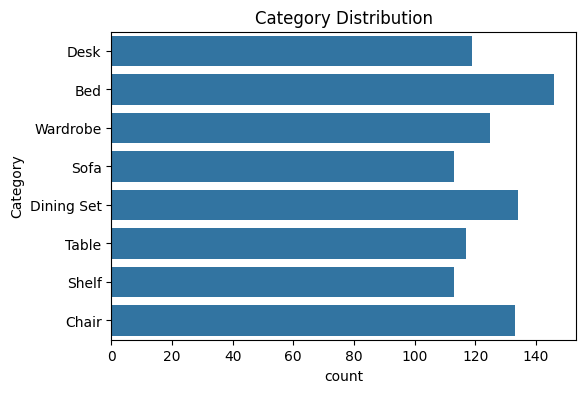

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(df['Category'])
plt.title("Category Distribution")
plt.show()

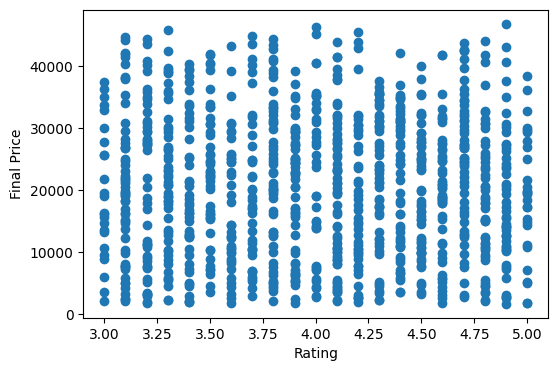

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df['Rating'], df['Final_Price'])
plt.xlabel("Rating")
plt.ylabel("Final Price")
plt.show()

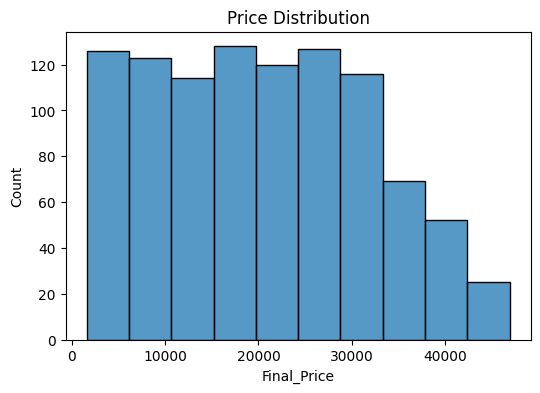

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['Final_Price'], bins=10)
plt.title("Price Distribution")
plt.show()


#Prepare Features

In [ ]:
le = LabelEncoder()
df['Category_enc'] = le.fit_transform(df['Category'])
df['Material_enc'] = le.fit_transform(df['Material'])
df['Brand_enc'] = le.fit_transform(df['Brand'])
df['Tag_enc'] = le.fit_transform(df['Tag'])


#Price Prediction

In [ ]:
X = df[['Rating','Original_Price','Discount_%','Category_enc','Material_enc','Brand_enc']]
y = df['Final_Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model_price = RandomForestRegressor()
model_price.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred_price = model_price.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred_price)

0.9978970994540237

In [ ]:
mean_absolute_error(y_test,y_pred_price)

364.3185054999993

#Sales Prediction(Predict'sold')

In [ ]:
df['Sold'] = np.where((df['Rating'] > 3.7) | (df['Discount_%'] > 20), 1, 0)


In [ ]:
X = df[['Rating','Original_Price','Discount_%','Category_enc','Material_enc','Brand_enc']]
y = df['Sold']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
model_sales = RandomForestClassifier()
model_sales.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
pred_sales = model_sales.predict(X_test)

In [ ]:
mae_sales = mean_absolute_error(y_test_s, y_pred_sales)
mae_sales

616.9986755555553

In [ ]:
accuracy_score(y_test, pred_sales)

1.0

#Category Classification('tag prediction')

In [ ]:
X = df[['Rating','Original_Price','Discount_%','Category_enc','Material_enc','Brand_enc']]
y = df['Tag_enc']

In [ ]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
model_tag = RandomForestClassifier()
model_tag.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
pred_tag = model_tag.predict(X_test)

In [ ]:
accuracy_score(y_test, pred_tag)

1.0

#Final prediction

In [ ]:
def final_prediction(input_data):
    price = model_price.predict([input_data])[0]
    sold = model_sales.predict([input_data])[0]
    tag = model_tag.predict([input_data])[0]
    tag_label = le.inverse_transform([tag])[0]

    return {
        "Predicted Final Price": price,
        "Will it Sell? (1=Yes, 0=No)": sold,
        "Predicted Tag": tag_label
    }


In [ ]:
sample = X_test.iloc[0].values
print(final_prediction(sample))

{'Predicted Final Price': np.float64(30704.70709999999), 'Will it Sell? (1=Yes, 0=No)': np.int64(1), 'Predicted Tag': 'Budget Friendly'}


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
